<a href="https://colab.research.google.com/github/Suryacant/Capstone1/blob/main/Failure_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Incomplete**

In [1]:
# Importing all the libraries needed
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
# Connect to Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Convert images to  a format that is supported by colab
# in my case images were .tif, so i converted them to .jpg
from PIL import Image
import os

def convert_images(input_folder_path, output_folder_path, original_format, target_format):
    for filename in os.listdir(input_folder_path):
        if filename.endswith(original_format):
            img = Image.open(os.path.join(input_folder_path, filename)).convert('RGB')
            target_filename = os.path.splitext(filename)[0] + target_format
            img.save(os.path.join(output_folder_path, target_filename))

# Usage
convert_images('/content/drive/MyDrive/For Faileure4/new day 3', '/content/drive/MyDrive/For Failure4.1/Day 3', '.tif', '.jpg')



KeyboardInterrupt: ignored

In [ ]:
convert_images('/content/drive/MyDrive/For Faileure4/new day 5', '/content/drive/MyDrive/For Failure4.1/Day 5', '.tif', '.jpg')

In [ ]:
convert_images('/content/drive/MyDrive/For Faileure4/new day 0', '/content/drive/MyDrive/For Failure4.1/Day 0', '.tif', '.jpg')

In [ ]:
# resize all the images and store in diffrent folders respectively
import os
from PIL import Image

def resize_images_in_folder(source_folder, target_folder, new_width=299, new_height=299):
    for filename in os.listdir(source_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(source_folder, filename))
            img = img.resize((new_width, new_height), Image.LANCZOS)
            img.save(os.path.join(target_folder, filename))

folders = (
    ('/content/drive/MyDrive/For Failure4.1/Day 0', '/content/drive/MyDrive/For Failure4.2/Day0'),
    ('/content/drive/MyDrive/For Failure4.1/Day 3', '/content/drive/MyDrive/For Failure4.2/Day3'),
    ('/content/drive/MyDrive/For Failure4.1/Day 5', '/content/drive/MyDrive/For Failure4.2/Day5')
)

for source_folder, target_folder in folders:
    resize_images_in_folder(source_folder, target_folder)


In [ ]:
# Create a dataset
#dataset = tf.keras.preprocessing.image_dataset_from_directory(
 #   dataset_dir,  # Path to the directory
  #  labels='inferred',  # Automatically infer the labels
   # label_mode='int',  # Labels will be integers
    #class_names=None,  # Automatically infer the class names
    #color_mode='rgb',  # Use RGB color mode
    #batch_size=32,  # Batch size
    #image_size=(299, 299),  # Resize images to this size
    #shuffle=True,  # Shuffle the data
    #seed=None,  # Optional random seed for shuffling)

In [3]:
# Creating constants for further use
BATCH_SIZE = 32
IMAGE_SIZE = 299
CHANNELS=3
EPOCHS=20

In [4]:
# Directory status
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/For Failure4.2',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4070 files belonging to 3 classes.


In [5]:
#Folder names and length(number) of batch
class_names = dataset.class_names
class_names, len(dataset)


(['Day0', 'Day3', 'Day5'], 128)

In [6]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy()) #using numpy , otherwise it will show tensor

(32, 299, 299, 3)
[1 2 2 0 2 1 0 1 1 0 2 2 0 1 0 1 2 2 1 0 1 2 2 2 2 2 1 2 0 2 1 2]


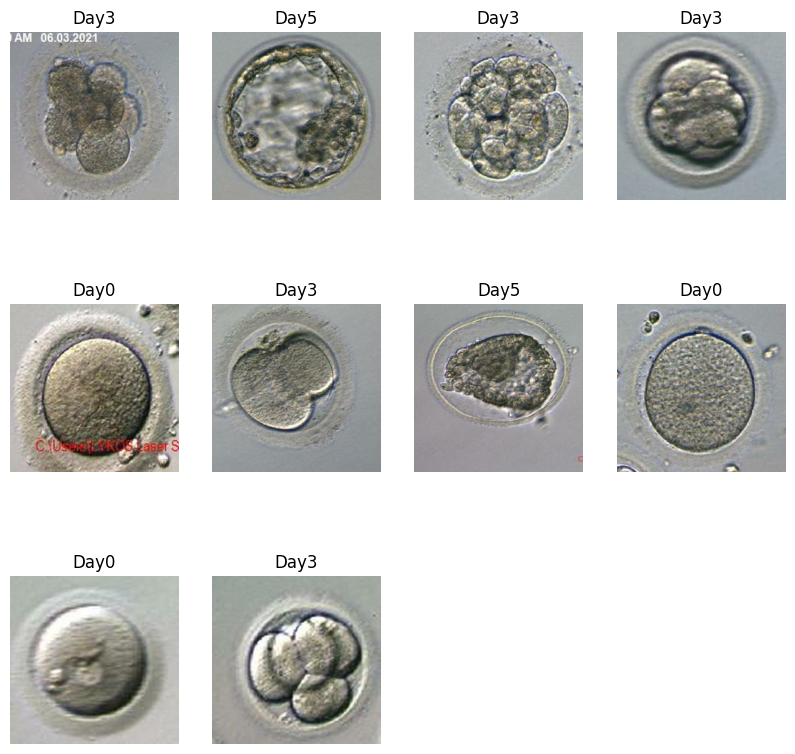

In [7]:
# To visualize images
plt.figure(figsize=(10,10)) # box size and image size
for image_batch, labels_batch in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(3, 4, i + 1) # if we dont do this we will get only 1 image, so, to get all the images asked above, plt.subplot(3, 4, i + 1) creates a subplot in a grid that has 3 rows and 4 columns
        plt.imshow(image_batch[i].numpy().astype("uint8")) #astype("uint8")) converting the floats into integers
        plt.title(class_names[labels_batch[i]])
        plt.axis("off") # to avoid X & Y axis

In [ ]:
len(dataset)

128

In [8]:
#to train and test data
train_size = 0.8 # as we dont have SKlearn (train_test_split)
len(dataset)*train_size

102.4

In [9]:
train_ds = dataset.take(102)
len(train_ds)

102

In [10]:
test_ds = dataset.skip(102)
len(test_ds)

26

In [ ]:
val_size=0.1
len(dataset)*val_size

12.8

In [11]:
val_ds = test_ds.take(12)
len(val_ds)

12

In [12]:
test_ds = test_ds.skip(12)
len(test_ds)

14

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=123)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

102

In [15]:
len(val_ds)

12

In [16]:
len(test_ds)

14

In [17]:
train_ds = train_ds.cache().shuffle(1500).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1500).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1500).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [19]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [20]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 299, 299, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 297, 297, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 148, 148, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 146, 146, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 73, 73, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 71, 71, 64)         

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
102/102 [==============================] - 674s 549ms/step - loss: 0.9343 - accuracy: 0.5219 - val_loss: 0.7332 - val_accuracy: 0.6823
Epoch 2/20
102/102 [==============================] - 47s 456ms/step - loss: 0.6256 - accuracy: 0.7372 - val_loss: 0.6282 - val_accuracy: 0.7474
Epoch 3/20
102/102 [==============================] - 46s 452ms/step - loss: 0.4645 - accuracy: 0.8181 - val_loss: 0.4169 - val_accuracy: 0.8255
Epoch 4/20
102/102 [==============================] - 46s 455ms/step - loss: 0.3937 - accuracy: 0.8493 - val_loss: 0.3927 - val_accuracy: 0.8438
Epoch 5/20
102/102 [==============================] - 47s 462ms/step - loss: 0.3482 - accuracy: 0.8706 - val_loss: 0.4312 - val_accuracy: 0.8229
Epoch 6/20
102/102 [==============================] - 46s 453ms/step - loss: 0.3179 - accuracy: 0.8802 - val_loss: 0.3402 - val_accuracy: 0.8932
Epoch 7/20
102/102 [==============================] - 45s 439ms/step - loss: 0.3126 - accuracy: 0.8870 - val_loss: 0.3106 - val_a

In [25]:
scores = model.evaluate(test_ds)

14/14 [==============================] - 11s 36ms/step - loss: 0.1336 - accuracy: 0.9487


In [26]:
scores

[0.1335998922586441, 0.9486607313156128]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 102}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
type(history.history['loss'])

list

In [31]:
len(history.history['loss'])

20

In [32]:
history.history['loss'][:5]

[0.9342870116233826,
 0.6256178617477417,
 0.46445608139038086,
 0.3937099277973175,
 0.3481873571872711]

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

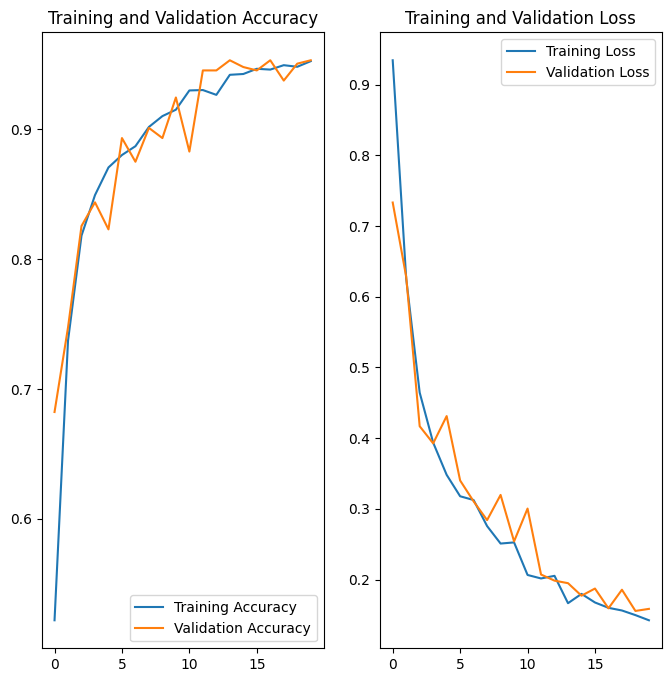

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Day5
1/1 [==============================] - 0s 49ms/step
predicted label: Day5


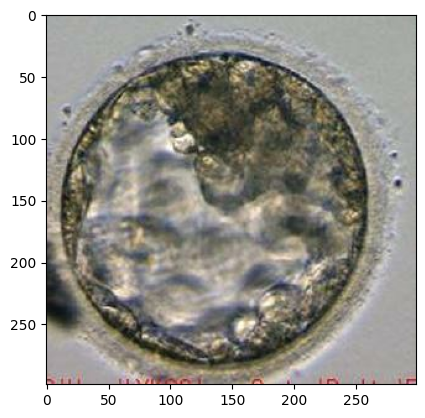

In [36]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 18ms/step


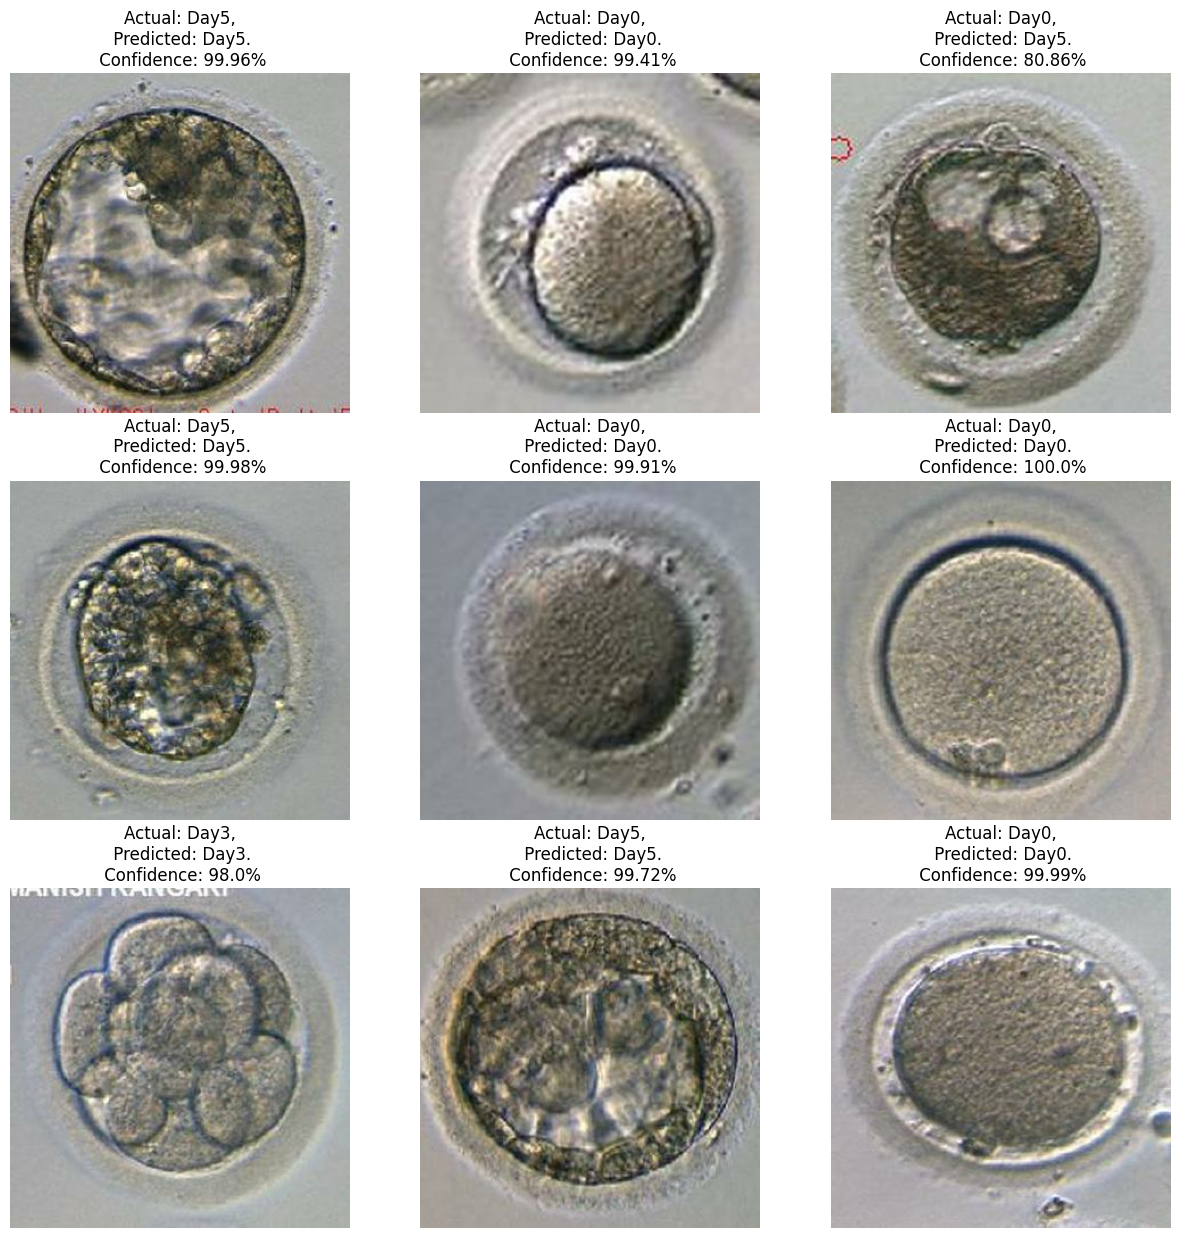

In [38]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [39]:
import os
model_version=max([int(i) for i in os.listdir("/content/drive/MyDrive/Success1.1") + [0]])+1
model.save(f"/content/drive/MyDrive/Success1.1/{model_version}")

In [40]:
model.save("../Embryo Predicting Model")